# Assignment 7 - Loan Approval Status

The notebook applies various regression models to loan approval data taken from [kaggle](https://www.kaggle.com/datasets/vipin20/loan-application-data) .

Problem statement - "Determine a
function f* such that f*(x) is the best predictor for y, with respect to D: f* = arg
min f∈F E(f, D)"


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report


### Preprocessing
Since the data given is very raw and unsuitable for to directly start working on it
1. It has some cells with missing information
2. Data types in cells are integer in all the coloumns.

We have to do some preprocessing which has been explained below.

After that we will calculate the correlation values of each paramter with our target i.e. loan approval status to see what all parameters actually have some relation/affect the target value.
This will help us reduce the number of dependent variables.

<>:28: SyntaxWarning: invalid escape sequence '\$'
<>:28: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2924871357.py:28: SyntaxWarning: invalid escape sequence '\$'
  df['Total_Income'] = df['Total_Income'].replace({'\$': ''}, regex=True).astype(float)


### 1. Loading Data ###

Shape after dropping NaN values: (390, 13)
Correctly mapped all categorical variables to a numerical format.

Data Info after Corrected Preprocessing:
<class 'pandas.core.frame.DataFrame'>
Index: 390 entries, 1 to 499
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   390 non-null    int64  
 1   Married                  390 non-null    int64  
 2   Dependents               390 non-null    int64  
 3   Education                390 non-null    int64  
 4   Self_Employed            390 non-null    int64  
 5   ApplicantIncome          390 non-null    int64  
 6   CoapplicantIncome        390 non-null    float64
 7   LoanAmount               390 non-null    float64
 8   Loan_Amount_Term         390 non-null    float64
 9   Credit_History           390 non-null    float64
 10  Loan_Status              390 non-null    int64  
 11  Total_Income     

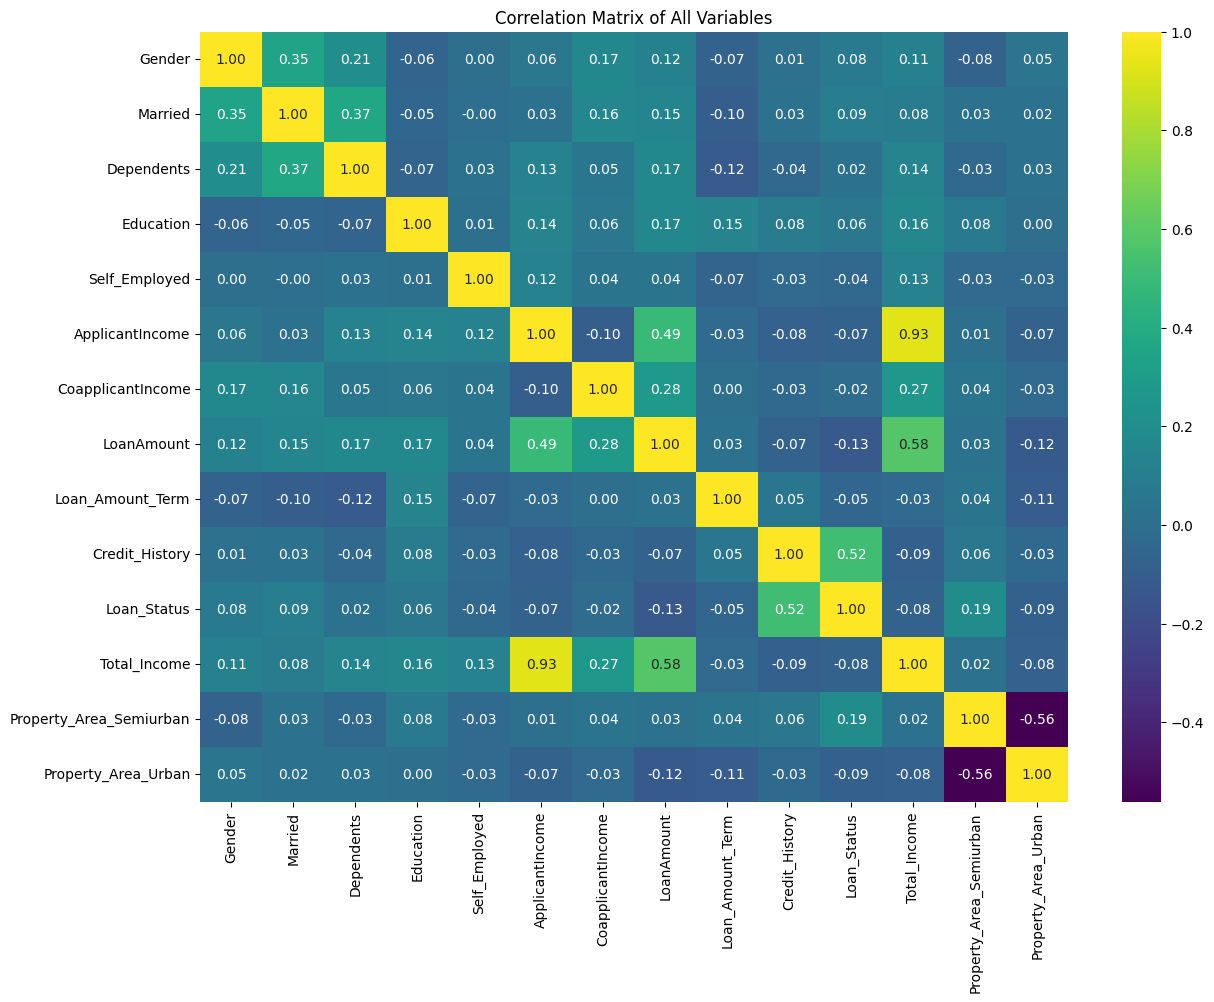


Removed low-correlation features. Remaining features:
['LoanAmount', 'Credit_History', 'Property_Area_Semiurban']
------------------------------


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

# --- 1. Load the Data ---
print("### 1. Loading Data ###")
# Load the dataset from the uploaded file
url = "https://drive.google.com/uc?id=1bedlHfWopA2xMiUMoDidJSHvuutST3md"

# 1) Load dataUntitled-spreadsheet-df1_loan
df = pd.read_csv(url)

#  2. Preprocess the Data
# Drop unnecessary columns
df.drop(['Loan_ID', 'Number'], axis=1, inplace=True)

# Handle Missing Values
df.dropna(inplace=True)
print(f"\nShape after dropping NaN values: {df.shape}")

# Clean and convert 'Total_Income' colmn
df['Total_Income'] = df['Total_Income'].replace({'\$': ''}, regex=True).astype(float)

# Correctly map all categorical columns to int or float format
df['Married'] = df['Married'].map({'Yes': 1, 'No': 0})
df['Self_Employed'] = df['Self_Employed'].map({'Yes': 1, 'No': 0})
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Education'] = df['Education'].map({'Graduate': 1, 'Not Graduate': 0})
df['Dependents'] = df['Dependents'].replace('3+', '3').astype(int)

# Use one-hot encoding for 'Property_Area'
df = pd.get_dummies(df, columns=['Property_Area'], drop_first=True, dtype=int)
print("Correctly mapped all categorical variables to a numerical format.")

print("\nData Info after Corrected Preprocessing:")
df.info()

# Define features (X) and target (y)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Correlation Analysis and Feature Selection
print("\n### Correlation Analysis ###")
corr_matrix = df.corr()

#  generates and displays the heatmap
print("\nDisplaying Correlation Heatmap:")
plt.figure(figsize=(14, 10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of All Variables')
plt.show()

target_corr = corr_matrix['Loan_Status'].abs()
low_corr_features = target_corr[target_corr < 0.1].index
X.drop(columns=low_corr_features, inplace=True)
print(f"\nRemoved low-correlation features. Remaining features:\n{X.columns.tolist()}")
print("-" * 30)

## Seperating Test and Training data

We have to split our data in such a way that there is enough data to both train and test our models.

In [ ]:
# 3. Split Data into Training and Testing Sets
print("\n### 3. Splitting Data ###")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print("-" * 30)

# 4. Train and Test Models
print("\n### 4. Training and Testing Models ###")

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


### 3. Splitting Data ###
Training data shape: (312, 3)
Testing data shape: (78, 3)
------------------------------

### 4. Training and Testing Models ###


## Linear Regression

It assumes that the relationship between input features (X) and the target (y) can be approximated with a straight line (linear function).

Formula:

𝑦 = 𝑤1𝑥1 + 𝑤2𝑥2 + ⋯ + 𝑤𝑛𝑥𝑛 + b

The model learns the weights (w) and bias (b) by minimizing the mean squared error between actual and predicted values.


In [ ]:
# Model 1: Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)
y_pred_lr_class = [1 if i > 0.5 else 0 for i in y_pred_lr]

print(f"Linear Regression Accuracy: {accuracy_score(y_test, y_pred_lr_class):.4f}")
print("\nClassification Report (Linear Regression):")
print(classification_report(y_test, y_pred_lr_class))


Linear Regression Accuracy: 0.7821

Classification Report (Linear Regression):
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.75      0.98      0.85        50

    accuracy                           0.78        78
   macro avg       0.84      0.70      0.72        78
weighted avg       0.81      0.78      0.76        78



## Ridge Regression
Ridge Regression is an improved version of Linear Regression that helps prevent overfitting.
It adds a penalty term (regularization) to the cost function to shrink large coefficients:

Formula:

Loss
= MSE + alpha * ∑ 𝑤_𝑖^2



The parameter (alpha) controls how strong the penalty is.

If α = 0 → it’s just Linear Regression.

Larger α → coefficients shrink more → model becomes simpler and less sensitive to noise.

In [ ]:
# Model 2: Ridge Regression
ridge_model = Ridge(alpha=20)
ridge_model.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_ridge_class = [1 if i > 0.5 else 0 for i in y_pred_ridge]

print(f"Ridge Regression Accuracy: {accuracy_score(y_test, y_pred_ridge_class):.4f}")
print("\nClassification Report (Ridge Regression):")
print(classification_report(y_test, y_pred_ridge_class))

Ridge Regression Accuracy: 0.7821

Classification Report (Ridge Regression):
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.75      0.98      0.85        50

    accuracy                           0.78        78
   macro avg       0.84      0.70      0.72        78
weighted avg       0.81      0.78      0.76        78



## SVR - Support vector regression

Support Vector Regression (SVR) is the regression counterpart of Support Vector Machines (SVMs), which are widely used in classification problems.  SVR focuses on fitting a function that predicts values within a tolerance margin (ε-insensitive tube) around the actual outputs.

Main idea -

Instead of penalizing all errors, SVR ignores small deviations (within ε) and only penalizes predictions that lie outside this margin.

The data points that lie outside the margin are called support vectors — they are the most important because they determine the shape of the regression function. i.e. the line determining the tube .

The optimization problem balances two goals:

1.Keeping the function as flat/simple as possible (to generalize well).

2.Allowing small errors within ε, but penalizing larger errors.

In [ ]:
# Model 3: Support Vector Regressor (SVR)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
y_pred_svr = svr_model.predict(X_test_scaled)
y_pred_svr_class = [1 if i > 0.5 else 0 for i in y_pred_svr]

print(f"SVR Accuracy: {accuracy_score(y_test, y_pred_svr_class):.4f}")
print("\nClassification Report (SVR):")
print(classification_report(y_test, y_pred_svr_class))
print("-" * 30)

SVR Accuracy: 0.7821

Classification Report (SVR):
              precision    recall  f1-score   support

           0       0.92      0.43      0.59        28
           1       0.75      0.98      0.85        50

    accuracy                           0.78        78
   macro avg       0.84      0.70      0.72        78
weighted avg       0.81      0.78      0.76        78

------------------------------


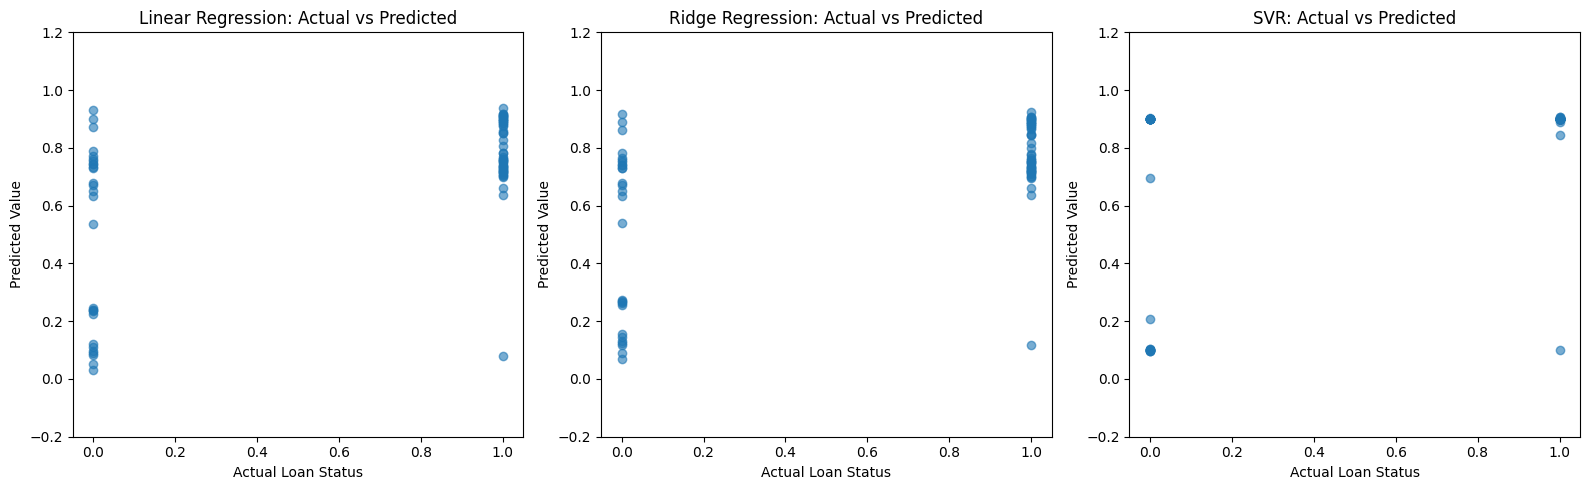

In [ ]:
# 5. Model Results

models = {
    "Linear Regression": (y_test, y_pred_lr, y_pred_lr_class),
    "Ridge Regression": (y_test, y_pred_ridge, y_pred_ridge_class),
    "SVR": (y_test, y_pred_svr, y_pred_svr_class),
}

# Scatter plots for each model
plt.figure(figsize=(16, 5))
for i, (name, (y_true, y_pred, y_class)) in enumerate(models.items(), 1):
    plt.subplot(1, 3, i)
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.xlabel("Actual Loan Status")
    plt.ylabel("Predicted Value")
    plt.title(f"{name}: Actual vs Predicted")
    plt.ylim(-0.2, 1.2)
plt.tight_layout()
plt.show()

## COmparing scatter plots

In the above scatter plots, a model is working correctly if the points are concentrated near (0,0) or (1,1) , basically predicted and actual loan approval status match.
Some observations

1.  higher concentration in SVR and predictions are more sparse in linear regression .
2. False positives are high but true negative are very less.

THe accuracy of the linear , ridge and SVR are looking same because we have taken any > 0.5 predicted value as 1 and < 0.5 value as 0.

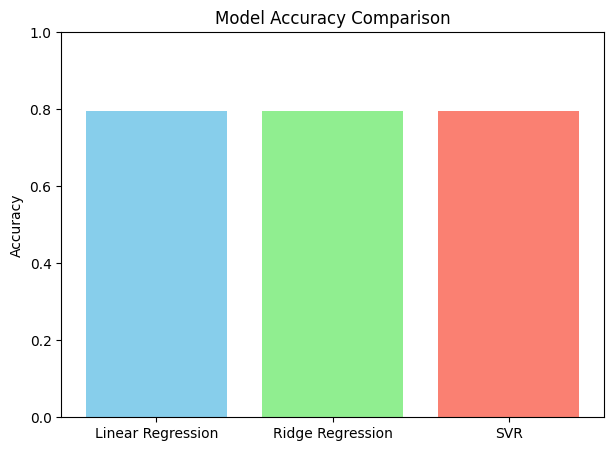

In [ ]:
# Bar chart for accuracy comparison
accuracies = {name: accuracy_score(y_true, y_class) for name, (y_true, _, y_class) in models.items()}
plt.figure(figsize=(7, 5))
plt.bar(accuracies.keys(), accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

# Wiki Document

## **Overview**
The general regression problem seeks to determine the best predictor function
𝑓∗ from a class of functions 𝐹
F that minimizes prediction error with respect to a dataset 𝐷.


In this project, we apply general regression techniques to the loan approval prediction problem, where the goal is to predict whether a loan application will be approved based on applicant attributes such as income, credit history, employment, and demographic details.


## **Methodology**
We consider multiple models from the function class
𝐹 and compare their performance:

### **Linear Regression:** '
A baseline model that assumes a linear relationship between features and loan approval. It assumes that the relationship between input features (X) and the target (y) can be approximated with a straight line (linear function).

Formula:

𝑦 = 𝑤1𝑥1 + 𝑤2𝑥2 + ⋯ + 𝑤𝑛𝑥𝑛 + b

The model learns the weights (w) and bias (b) by minimizing the mean squared error between actual and predicted values.

### **Ridge Regression:**
Ridge Regression is an improved version of Linear Regression that helps prevent overfitting.
It adds a penalty term (regularization) to the cost function to shrink large coefficients:

Formula:

Loss
= MSE + alpha * ∑ 𝑤_𝑖^2



The parameter (alpha) controls how strong the penalty is.

If α = 0 → it's just Linear Regression.

Larger α → coefficients shrink more → model becomes simpler and less sensitive to noise.

### **Support Vector Regression (SVR):**
 Support Vector Regression (SVR) is the regression counterpart of Support Vector Machines (SVMs), which are widely used in classification problems. SVR focuses on fitting a function that predicts values within a tolerance margin (ε-insensitive tube) around the actual outputs.

Main idea -

Instead of penalizing all errors, SVR ignores small deviations (within ε) and only penalizes predictions that lie outside this margin.

The data points that lie outside the margin are called support vectors — they are the most important because they determine the shape of the regression function. i.e. the line determining the tube .

The optimization problem balances two goals:

1.Keeping the function as flat/simple as possible (to generalize well).

2.Allowing small errors within ε, but penalizing larger errors.

## **Multilingual Data Handling**

There are very less columns in our data which will actually be affected from being collected from regions of different languages.
Particularly data entries which are taken as strings like property area , gender which can easily be taken care of while taking the data itself as they are not affected by language much or by ecndoing them to numbers after receving the data .


## **Fintech Applications**

In financial technology (FinTech), loan approval prediction is a high-stakes decision with real-world consequences. Accurate prediction models can:

1)Reduce default risk by identifying high-risk applicants.

2)Improve financial inclusion by enabling fairer access to loans.

3)Support regulatory compliance by providing explainable decision-making processes.

## **Implementation**

The project was implemented in Python using common machine learning libraries (pandas, numpy etc).

Steps:

1)Data Preprocessing - Handling missing values, encoding categorical features.

2)Finding relevant parameters - We constructed a covariance matrix between the parameters to select the relevant parameters.

Model Training - Fitting Linear Regression, Ridge Regression, and SVR models.

Evaluation - Comparing predictions against true loan approval outcomes using chosen metrics.

While Linear and Ridge regression provide interpretable coefficients, SVR offers flexibility in capturing complex relationships.

## **Evaluation Metrics**

For this classification task, the following metrics are used:

1)Precision: The proportion of correctly predicted approvals out of all predicted approvals.

2)Recall: The proportion of correctly predicted approvals out of all actual approvals.

3)F1-Score: The harmonic mean of Precision and Recall, balancing false positives and false negatives.

## **References**


1) Hastie, T., Tibshirani, R., & Friedman, J. (2009). The Elements of Statistical Learning: Data Mining, Inference, and Prediction. Springer.

2) CS337+335 course , IIT Bombay https://colab.research.google.com/drive/1qQ1O_OLWEMApf95QXlsuf5ddR8DrLnR0#scrollTo=8uKWmo9_U4fl&line=105&uniqifier=1
